In [1]:
import meep as mp
import random

#help(mp.Medium)

# Define materials
brick = mp.Medium(epsilon=6)
concrete = mp.Medium(epsilon=5)
drywall = mp.Medium(epsilon=2.8)
insulation = mp.Medium(epsilon=1.2)
materials = [brick, concrete, drywall, insulation]

# Define simulation cell
cell = mp.Vector3(8, 8, 0)

# Define source
src_pos = mp.Vector3(-3, -3, 0)
src = mp.Source(src=mp.ContinuousSource(frequency=2.45e9),
                 component=mp.Ez, center=src_pos)

# Define list of objects
obj_list = []
for i in range(20):
    # Randomly choose material
    material = random.choice(materials)
    # Randomly choose position, width, and height
    pos = mp.Vector3(random.uniform(-3, 3), random.uniform(-3, 3), 0)
    width = random.uniform(0.5, 1.5)
    height = random.uniform(0.5, 1.5)
    # Set depth based on material
    if material == brick:
        depth = 0.10
    elif material == concrete:
        depth = 0.20
    elif material == drywall:
        depth = 0.012
    elif material == insulation:
        depth = 0.10
    # Create object
    size = mp.Vector3(width, height, depth)
    obj = mp.Block(size=size, center=pos, material=material)
    obj_list.append(obj)

# Define simulation
sim = mp.Simulation(cell_size=cell, boundary_layers=[mp.PML(1.0)], geometry=obj_list,
                    sources=[src], resolution=30)
sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(1, mp.output_efield_z)), until=20000)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000273943 s
Working in 2D dimensions.
Computational cell is 8 x 8 x 0 with resolution 30
     block, center = (0.250976,1.51841,0)
          size (0.517753,1.06458,0.012)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8,2.8,2.8)
     block, center = (0.349249,-1.36754,0)
          size (1.47233,1.06349,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6,6,6)
     block, center = (-2.45533,2.20169,0)
          size (0.558662,1.15302,0.012)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.8,2.8,2.8)
     block, center = (-2.99142,-2.20351,0)
          size (1.2197,0.870402,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6,6,6)
     block, center = (1.34634,-0.17028,0)
          size (0.698313,1.26426,0.2)
          axes (1,0,0), (0,1,0)

FloatProgress(value=0.0, description='0% done ', max=20000.0)

creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
Meep progress: 107.11666666666666/20000.0 = 0.5% done in 4.0s, 742.9s to go
on time step 6462 (time=107.7), 0.000619965 s/step
Meep progress: 253.04999999999998/20000.0 = 1.3% done in 8.0s, 624.3s to go
on time step 15243 (time=254.05), 0.000455561 s/step
Meep progress: 401.0/20000.0 = 2.0% done in 12.0s, 586.7s to go
on time step 24120 (time=402), 0.00045091 s/step
Meep progress: 547.7/20000.0 = 2.7% done in 16.0s, 568.4s to go
on time step 32916 (time=548.6), 0.000454768 s/step
Meep progress: 696.1/20000.0 = 3.5% done in 20.0s, 554.8s to go
on time step 41829 (time=697.15), 0.000448815 s/step
Meep progress: 842.5333333333333/20000.0 = 4.2% done in 24.0s, 545.8s to go
on time step 50615 (time=843.583), 0.000455286 s/step
Meep progress: 991.3333333333334/20000.0 = 5.0% done in 28.0s, 537.0s to go
on time step 59548 (time=992.467), 0.000447789 s/step
Meep progress: 1139.7/20000.0 = 5.7% done in 32.0s, 529.6s 

Meep progress: 13122.733333333334/20000.0 = 65.6% done in 264.0s, 138.4s to go
on time step 787555 (time=13125.9), 0.000319261 s/step
Meep progress: 13333.65/20000.0 = 66.7% done in 268.0s, 134.0s to go
on time step 800215 (time=13336.9), 0.000315969 s/step
Meep progress: 13542.0/20000.0 = 67.7% done in 272.0s, 129.7s to go
on time step 812709 (time=13545.1), 0.000320166 s/step
Meep progress: 13754.116666666667/20000.0 = 68.8% done in 276.0s, 125.4s to go
on time step 825445 (time=13757.4), 0.000314072 s/step
Meep progress: 13968.0/20000.0 = 69.8% done in 280.0s, 120.9s to go
on time step 838265 (time=13971.1), 0.000312014 s/step
Meep progress: 14181.283333333333/20000.0 = 70.9% done in 284.0s, 116.5s to go
on time step 851058 (time=14184.3), 0.000312689 s/step
Meep progress: 14394.783333333333/20000.0 = 72.0% done in 288.0s, 112.2s to go
on time step 863873 (time=14397.9), 0.000312148 s/step
Meep progress: 14609.4/20000.0 = 73.0% done in 292.0s, 107.8s to go
on time step 876747 (time=

In [2]:
import numpy as np
import matplotlib.pyplot as plt
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
ez_max = np.max(ez_data)

In [3]:
# sim.plot3D()

/home/deschmi/micromamba/envs/transparent-walls/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/deschmi/micromamba/envs/transparent-walls/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


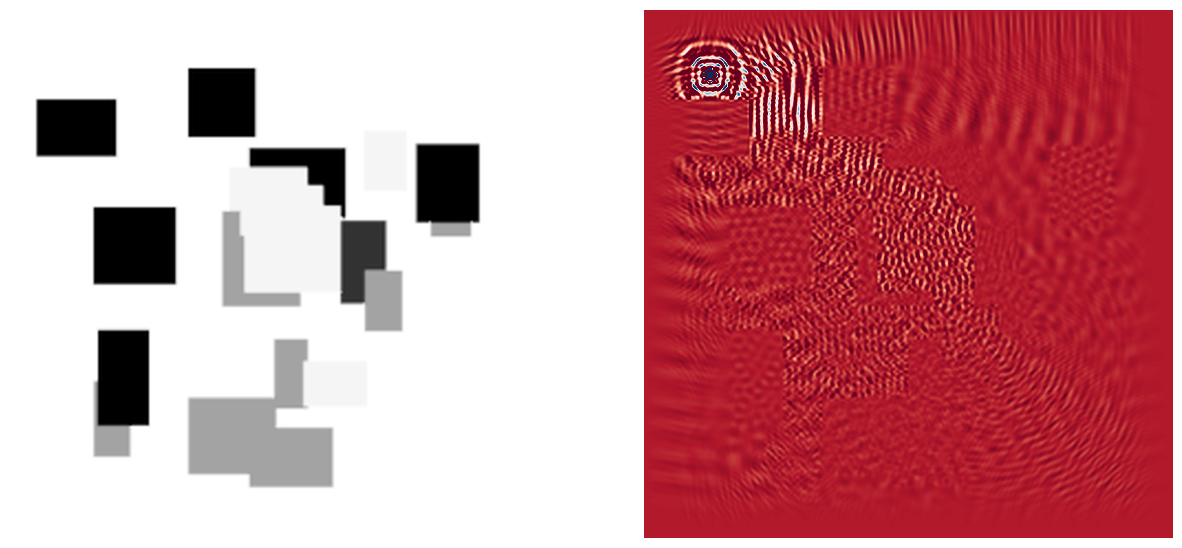

In [4]:
min_ez = np.min(ez_data)
max_ez = np.max(ez_data)
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt1.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt1.axis('off')
plt2.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', vmin=min_ez*0.01, vmax=max_ez*0.01)
plt2.axis('off')
plt.show()

In [5]:
import h5py
f = h5py.File('ez.h5', 'r')

/home/deschmi/micromamba/envs/transparent-walls/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/deschmi/micromamba/envs/transparent-walls/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [6]:
timepoints = f['ez']

In [7]:
max_signal = np.max(timepoints, axis=2)

In [8]:
max_max_signal = np.max(max_signal)
min_max_signal = np.min(max_signal)
print(max_max_signal)
print(min_max_signal)

1.61090629299894e-08
-1.4922169300691376e-09


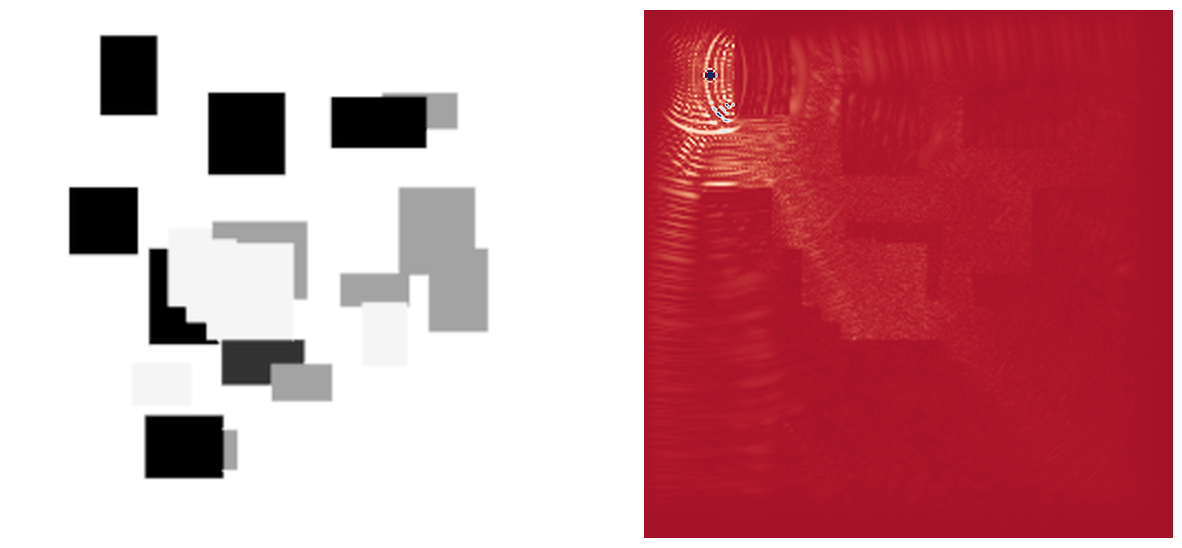

In [9]:
fig, (plt1, plt2) = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
#plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt1.imshow(eps_data, interpolation='spline36', cmap='binary')
plt1.axis('off')
plt2.imshow(max_signal, interpolation='spline36', cmap='RdBu', vmin=min_max_signal*0.1, vmax=max_max_signal*0.1)
plt2.axis('off')
plt.show()